# EDA - Exploratory Data Analysis

In [1]:
import pandas as pd

## Loading the data

In [2]:
df = pd.read_csv("data/income_data.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


## Overall observations

In [4]:
df['target'].mean()

0.2408095574460244

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
 15  target          32561 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


## Individual Features

<AxesSubplot:ylabel='Frequency'>

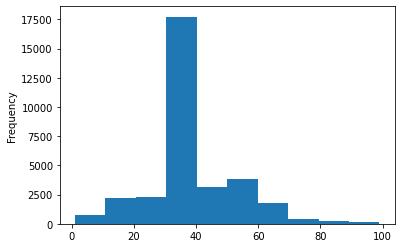

In [7]:
df['hours-per-week'].plot.hist()

In [8]:
df[df['hours-per-week'] < 40]['target'].mean()

0.09506634033234575

In [11]:
df[df['hours-per-week'] < 40].shape

(7763, 16)

In [13]:
df[df['hours-per-week'] == 40]['target'].mean()

0.2133797726227246

In [14]:
df[df['hours-per-week'] == 40].shape

(15217, 16)

In [15]:
df[df['hours-per-week'] > 40]['target'].mean()

0.4024632084333577

In [16]:
df[df['hours-per-week'] > 40].shape

(9581, 16)

In [17]:
pd.cut(df['hours-per-week'], [0, 39, 40, 100])

0        (39, 40]
1         (0, 39]
2        (39, 40]
3        (39, 40]
4        (39, 40]
           ...   
32556     (0, 39]
32557    (39, 40]
32558    (39, 40]
32559     (0, 39]
32560    (39, 40]
Name: hours-per-week, Length: 32561, dtype: category
Categories (3, interval[int64, right]): [(0, 39] < (39, 40] < (40, 100]]

In [18]:
df.groupby(
    pd.cut(df['hours-per-week'], [0, 39, 40, 100])
)['target'].mean()

hours-per-week
(0, 39]      0.095066
(39, 40]     0.213380
(40, 100]    0.402463
Name: target, dtype: float64

### One more example

<AxesSubplot:ylabel='Frequency'>

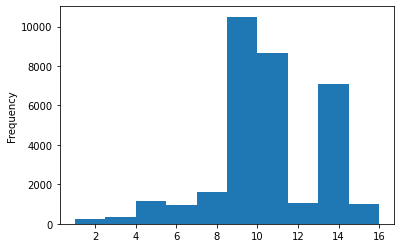

In [19]:
df['education-num'].plot.hist()

In [20]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [22]:
df.groupby('education')['target'].mean().sort_values()

education
 Preschool       0.000000
 1st-4th         0.035714
 5th-6th         0.048048
 11th            0.051064
 9th             0.052529
 7th-8th         0.061920
 10th            0.066452
 12th            0.076212
 HS-grad         0.159509
 Some-college    0.190235
 Assoc-acdm      0.248360
 Assoc-voc       0.261216
 Bachelors       0.414753
 Masters         0.556587
 Prof-school     0.734375
 Doctorate       0.740920
Name: target, dtype: float64

<AxesSubplot:xlabel='education'>

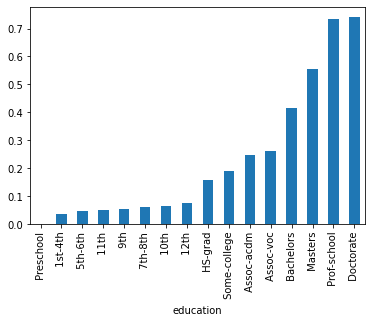

In [23]:
df.groupby('education')['target'].mean().sort_values().plot.bar()

<AxesSubplot:xlabel='education'>

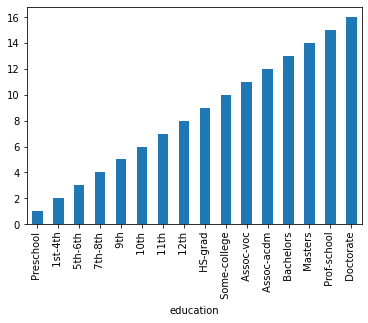

In [24]:
df.groupby('education')['education-num'].mean().sort_values().plot.bar()

In [26]:
df.groupby('education').size().sort_values()

education
 Preschool          51
 1st-4th           168
 5th-6th           333
 Doctorate         413
 12th              433
 9th               514
 Prof-school       576
 7th-8th           646
 10th              933
 Assoc-acdm       1067
 11th             1175
 Assoc-voc        1382
 Masters          1723
 Bachelors        5355
 Some-college     7291
 HS-grad         10501
dtype: int64

## Mulitvariate Exploration

<AxesSubplot:xlabel='hours-per-week', ylabel='education-num'>

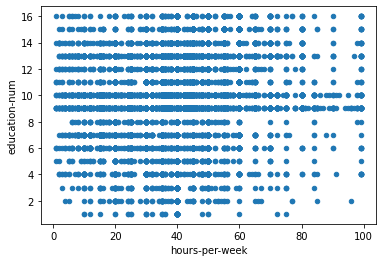

In [27]:
df.plot.scatter('hours-per-week', 'education-num')

In [28]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
target,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:xlabel='hours-per-week', ylabel='education-num'>

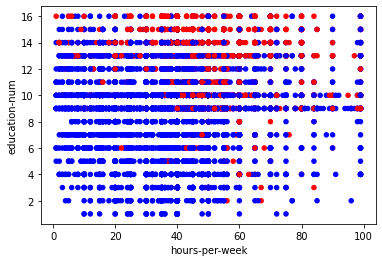

In [29]:
df.plot.scatter('hours-per-week', 'education-num',
                c=['r' if t ==1 else 'b' for t in df['target']])

# Training a model (in sklearn)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### One-hot encoding, the Pandas way

In [31]:
one_hot = pd.get_dummies(df[['sex', 'education']], drop_first=True)

In [33]:
pd.get_dummies(df['sex'], drop_first=True)

,Male
0,1
1,1
2,1
3,1
4,0
...,...
32556,0
32557,1
32558,0
32559,1


In [34]:
one_hot

,sex_ Male,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32557,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32558,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32559,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Simple feature selection

In [36]:
one_hot.var().sort_values()

education_ Preschool       0.001564
education_ 1st-4th         0.005133
education_ 5th-6th         0.010123
education_ Doctorate       0.012523
education_ 12th            0.013122
education_ 9th             0.015537
education_ Prof-school     0.017377
education_ 7th-8th         0.019447
education_ Assoc-acdm      0.031696
education_ 11th            0.034785
education_ Assoc-voc       0.040643
education_ Masters         0.050117
education_ Bachelors       0.137417
education_ Some-college    0.173784
education_ HS-grad         0.218501
sex_ Male                  0.221376
dtype: float64

In [37]:
one_hot.columns[one_hot.var() > 0.04]

Index(['sex_ Male', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ HS-grad', 'education_ Masters', 'education_ Some-college'],
      dtype='object')

In [39]:
one_hot_selected = one_hot[one_hot.columns[one_hot.var() > 0.04]]

### Put together a data set

In [42]:
X = df[['age', 'hours-per-week']].join(one_hot_selected)
y = df['target']

In [43]:
X

,age,hours-per-week,sex_ Male,education_ Assoc-voc,education_ Bachelors,education_ HS-grad,education_ Masters,education_ Some-college
0,39,40,1,0,1,0,0,0
1,50,13,1,0,1,0,0,0
2,38,40,1,0,0,1,0,0
3,53,40,1,0,0,0,0,0
4,28,40,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
32556,27,38,0,0,0,0,0,0
32557,40,40,1,0,0,1,0,0
32558,58,40,0,0,0,1,0,0
32559,22,20,1,0,0,1,0,0


In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [46]:
model = DecisionTreeClassifier(max_depth=5).fit(Xtrain, ytrain)

In [47]:
model

DecisionTreeClassifier(max_depth=5)

In [48]:
(model.predict(Xtest) == ytest).mean()

0.7882075954550107

In [50]:
metrics.accuracy_score(ytest, model.predict(Xtest))

0.7882075954550107

In [52]:
metrics.confusion_matrix(ytest, model.predict(Xtest))

array([[6784,  654],
       [1415,  916]])

/Users/DIRH/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


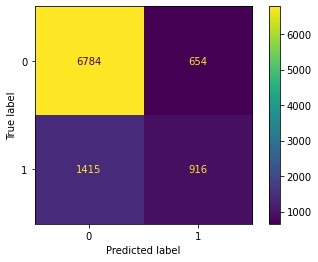

In [54]:
metrics.plot_confusion_matrix(model, Xtest, ytest)

In [55]:
metrics.f1_score(ytest, model.predict(Xtest))

0.46962317354524474

/Users/DIRH/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


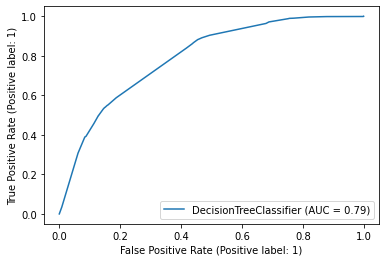

In [56]:
metrics.plot_roc_curve(model, Xtest, ytest)